In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
ds = ImageDataGenerator(rotation_range=20, 
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        validation_split=0.2,
                        rescale=1/255,)

In [3]:
train_dataset = ds.flow_from_directory("./Dataset", 
                                 class_mode='categorical', color_mode = "grayscale",
                                 target_size=(45,45),
                                 subset="training")

test_dataset = ds.flow_from_directory("./Dataset",
                                 class_mode='categorical', color_mode = "grayscale",
                                 target_size=(45,45),
                                 subset="validation")

Found 156102 images belonging to 15 classes.
Found 39017 images belonging to 15 classes.


# Exploring Dataset

In [4]:
print(train_dataset)

In [5]:
train_dataset.class_indices

{'(': 0,
 ')': 1,
 '+': 2,
 '-': 3,
 '0': 4,
 '1': 5,
 '2': 6,
 '3': 7,
 '4': 8,
 '5': 9,
 '6': 10,
 '7': 11,
 '8': 12,
 '9': 13,
 '=': 14}

In [9]:
import cv2
img = cv2.imread(".Dataset/-/-_66.jpg", cv2.IMREAD_GRAYSCALE)

None


# Defining Model

In [12]:
model = tf.keras.models.Sequential([
    #1st Layer
    tf.keras.layers.ZeroPadding2D(name="ZP1",input_shape=(45,45,1),),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",padding="valid",name='Conv1',),
    tf.keras.layers.BatchNormalization(name="BN1",),
    tf.keras.layers.ZeroPadding2D(name="ZP2"),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",padding="valid",name='Conv2'),
    tf.keras.layers.BatchNormalization(name="BN2",),
    tf.keras.layers.MaxPool2D((2,2),name="MP1"),
    #2nd Layer
    tf.keras.layers.ZeroPadding2D(name="ZP3"),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="valid",name="Conv3"),
    tf.keras.layers.BatchNormalization(name="BN3"),
    tf.keras.layers.ZeroPadding2D(name="ZP4"),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="valid",name='Conv4'),
    tf.keras.layers.BatchNormalization(name="BN4"),
    tf.keras.layers.MaxPool2D((2,2),name="MP2"),
    #3rd Layer
    tf.keras.layers.ZeroPadding2D(name="ZP5"),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu",padding="valid",name="Conv5"),
    tf.keras.layers.BatchNormalization(name="BN5"),
    tf.keras.layers.ZeroPadding2D(name="ZP6"),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu",padding="valid",name='Conv6'),
    tf.keras.layers.BatchNormalization(name="BN6"),
    tf.keras.layers.MaxPool2D((2,2),name="MP3"),
    #Flat Layers
    tf.keras.layers.BatchNormalization(name="BN7"),
    tf.keras.layers.Flatten(name="Flatten"),
    tf.keras.layers.Dense(256,activation="relu",name="Dense1"),
    tf.keras.layers.Dense(512,activation="relu",name="Dense2"),
    tf.keras.layers.BatchNormalization(name="BN8"),
    tf.keras.layers.Dense(15,activation="softmax",name="Dense3")
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ZP1 (ZeroPadding2D)          (None, 47, 47, 1)         0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 45, 45, 32)        320       
_________________________________________________________________
BN1 (BatchNormalization)     (None, 45, 45, 32)        128       
_________________________________________________________________
ZP2 (ZeroPadding2D)          (None, 47, 47, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 45, 45, 32)        9248      
_________________________________________________________________
BN2 (BatchNormalization)     (None, 45, 45, 32)        128       
_________________________________________________________________
MP1 (MaxPooling2D)           (None, 22, 22, 32)       

In [14]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
history = model.fit(train_dataset,epochs=3,verbose=1,batch_size=32,validation_data=test_dataset)

Epoch 1/3
4879/4879 [==============================] - 3652s 748ms/step - loss: 0.2642 - accuracy: 0.9190 - val_loss: 21.5354 - val_accuracy: 0.0457
Epoch 2/3
4879/4879 [==============================] - 2950s 605ms/step - loss: 0.1427 - accuracy: 0.9564 - val_loss: 0.1412 - val_accuracy: 0.9561
Epoch 3/3
4879/4879 [==============================] - 2913s 597ms/step - loss: 0.1195 - accuracy: 0.9643 - val_loss: 0.1178 - val_accuracy: 0.9623


In [16]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
model.save('./solver.h5')

(700, 700, 3)
(1, 45, 45, 1)


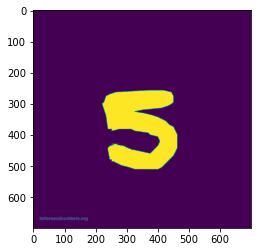

In [18]:
img = cv2.imread('./55.jpg')
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.array(img)
img = ~img
imgl = np.resize(img, (45,45))
imgl = imgl.reshape((-1,45,45,1))
print(imgl.shape)
plt.imshow(img)
plt.show()

In [19]:
res = model.predict(imgl)
print(np.argmax(res))

4
